Import library which we needed

In [1]:
import requests
import json
import csv
import pandas as pd
import cal_price
import day_price
from pandas import json_normalize
import matplotlib.pyplot as plt

Design a function that retrieves JSON data from a specific API endpoint on Crypto.com.

In [2]:
def generate_json_csv(url,headers,csv_file_path, column = None, row = None):
    # Send a GET request with custom headers and receive a JSON response
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        try:
            # Check if there's still one level to extract (assuming 'data' is the key to be extracted)
            if column == 'data':
                # df = pd.json_normalize(df, record_path=['statusCode', 'message', 'data'], meta=[column])
                data = json.loads(response.text)
                # Initialize an empty list to store flattened data
                flattened_data = []
                # Iterate through the nested data
                for crypto_name, crypto_data in data[column].items():
                    row = {
                        "statusCode": data["statusCode"],
                        "message": data["message"],
                        "crypto_name": crypto_name,
                        "eVol24h": crypto_data.get("eVol24h"),
                        "eVol30d": crypto_data.get("eVol30d"),
                        "cVol24h": crypto_data.get("cVol24h"),
                        "cVol30d": crypto_data.get("cVol30d"),
                        "txCnt24h": crypto_data.get("txCnt24h"),
                        "txCnt30d": crypto_data.get("txCnt30d"),
                        "txFees24h":crypto_data.get("txFees24h"), 
                        "txFees30d":crypto_data.get("txFees30d"), 
                        "txFeesMean24h":crypto_data.get("txFeesMean24h"), 
                        "cVolAdj24h":crypto_data.get("cVolAdj24h"),
                        "ret24h": crypto_data.get("ret24h"),
                        "retMTD": crypto_data.get("retMTD"),
                        "retQTD": crypto_data.get("retQTD"),
                        "retYTD": crypto_data.get("retYTD"),
                        "retY1": crypto_data.get("retY1"),
                        "retY3": crypto_data.get("retY3"),
                        "retY5": crypto_data.get("retY5"),
                        "retSI": crypto_data.get("retSI"),
                        "volat30d": crypto_data.get("volat30d"),
                        "low52w": crypto_data.get("low52w"),
                        "high52w": crypto_data.get("high52w"),
                        "splyCurr": crypto_data.get("splyCurr"),
                        "splyTotal":crypto_data.get("splyTotal"), 
                        "splyMax": crypto_data.get("splyMax"),
                        "ath": crypto_data.get("ath"),
                        "ts": crypto_data.get("ts"),
                        "src": crypto_data.get("src"),
                        "category": crypto_data.get("category"),
                        "type": crypto_data.get("type"),
                        "algorithm":crypto_data.get("algorithm"), 
                    }
                    flattened_data.append(row)

                # Create a DataFrame from the flattened data
                df = pd.DataFrame(flattened_data)

            elif column == 'price':
                # df = pd.json_normalize(df, record_path=['statusCode', 'message', 'data'], meta=[column])
                data = json.loads(response.text)
                # Initialize an empty list to store flattened data
                flattened_data = []
                # Iterate through the nested data
                for data_list in data[column]:
                    row = {
                        "name": data["name"],
                        "symbol": data["symbol"],
                        "id": data["id"],
                        "guid": data["guid"],
                        "date": data_list.get("date"),
                        "price": data_list.get("price"),
                        "amount": data_list.get("amount"),
                    }
                    flattened_data.append(row)

                # Create a DataFrame from the flattened data
                df = pd.DataFrame(flattened_data)

            else:
            # Parse the JSON response using pandas
                df = pd.DataFrame(response.json())

            # Write the DataFrame to a CSV file
            df.to_csv(csv_file_path, index=False)

            print(f'Data has been successfully written to {csv_file_path}')

        except pd.errors.EmptyDataError as e:
            print('No data found in the JSON response.')
        except json.JSONDecodeError as e:
            print(f'Error decoding JSON: {e}')
    else:
        print(f'Error: Status Code {response.status_code}')


Run the function

In [3]:
generate_json_csv(day_price.URL,day_price.HEADERS,day_price.FILE_PATH,day_price.COLUMNS)
generate_json_csv(cal_price.URL,cal_price.HEADERS,cal_price.FILE_PATH,cal_price.COLUMNS)

Data has been successfully written to daily_price.csv
Data has been successfully written to calculation_price.csv


Generate a graphical representation illustrating the BTC price movement alongside a 30,000 USD average price reference.

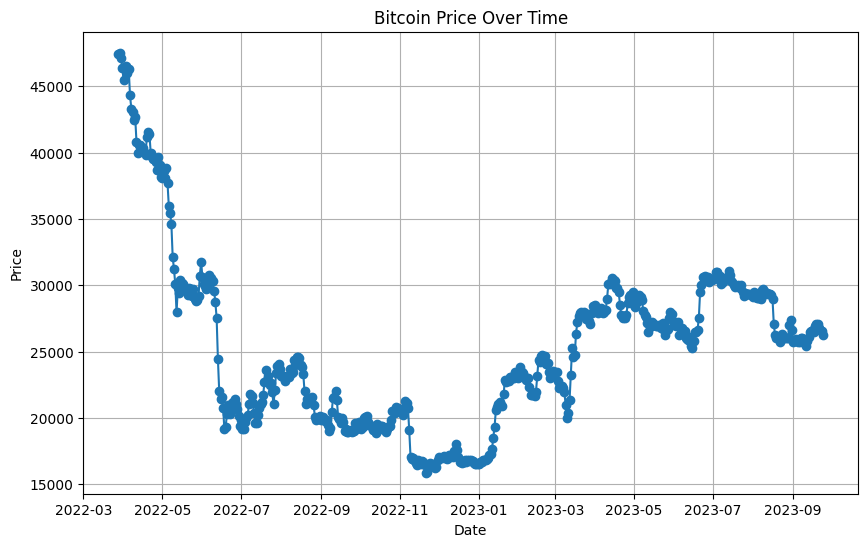

In [4]:
# Read csv file for data analysis
pd_daily_price = pd.read_csv('daily_price.csv')

# Convert the 'date' column to a datetime object
pd_daily_price['date'] = pd.to_datetime(pd_daily_price['date'])

# # Create a time series line chart
plt.figure(figsize=(10, 6))
plt.plot(pd_daily_price['date'], pd_daily_price['price'], marker='o', linestyle='-')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

Create a bar chart to explain time changes of the trading amount,and you see BTC passion have fatde away since 2022-07

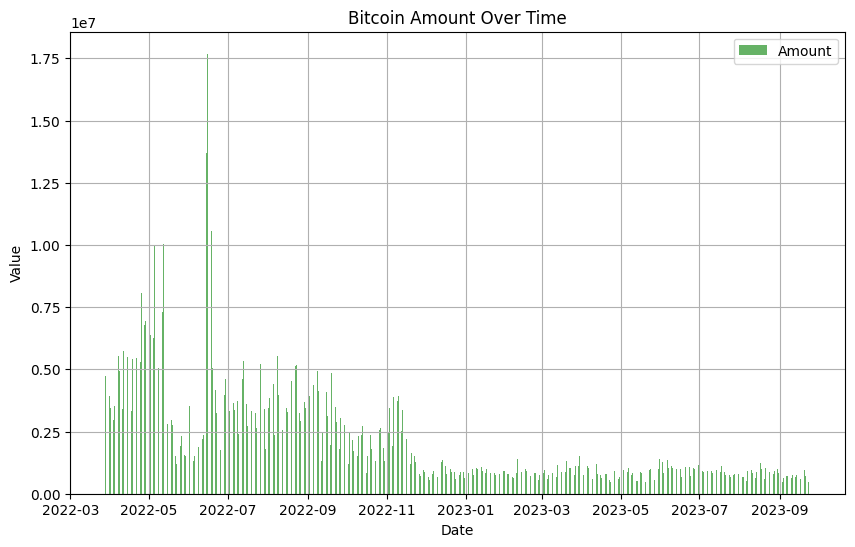

In [5]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(pd_daily_price['date'], pd_daily_price['amount'], width=0.4, label='Amount', align='edge', color='g', alpha=0.6)
plt.title('Bitcoin Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

Highlighting the positive yearly return, it's worth noting that despite significant price fluctuations, the return remains relatively modest. Additionally, Ethereum (ETH) exhibits potential to challenge Bitcoin (BTC) for the position of the dominant cryptocurrency in the market.

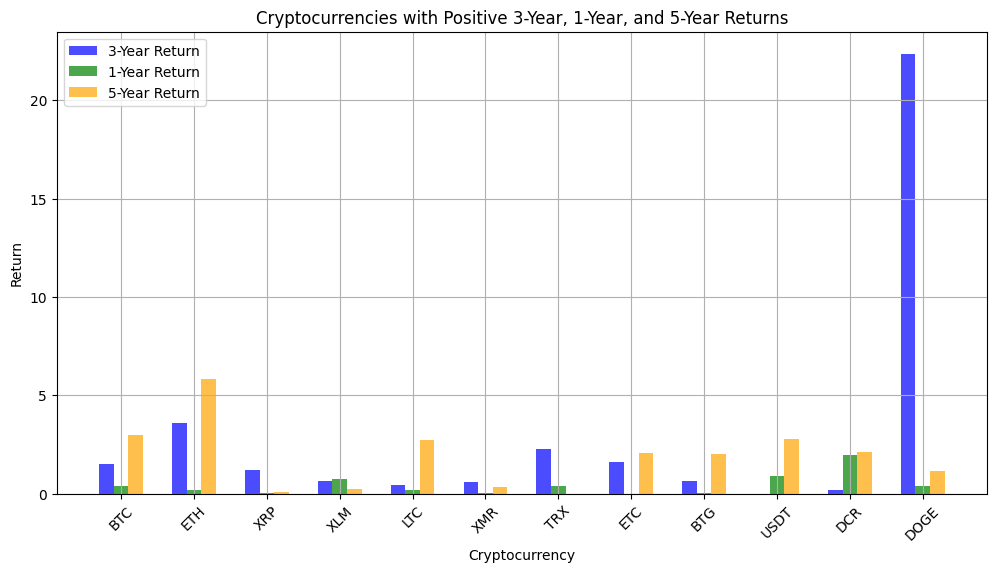

In [6]:
# Read csv file for data analysis
pd_calculation_price = pd.read_csv('calculation_price.csv')

# Filter data for cryptocurrencies with positive returns
positive_3yr_return = pd_calculation_price[pd_calculation_price['retY3'] > 0]
positive_1yr_return = pd_calculation_price[pd_calculation_price['retY1'] > 0]
positive_5yr_return = pd_calculation_price[pd_calculation_price['retY5'] > 0]

# Create a bar chart to visualize 3-year, 1-year, and 5-year returns
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = range(len(positive_3yr_return))

# Ensure that all filtered dataframes have the same length (e.g., by limiting the number of rows)
num_cryptos_to_plot = min(len(positive_3yr_return), len(positive_1yr_return), len(positive_5yr_return))

plt.bar(index[:num_cryptos_to_plot], positive_3yr_return['retY3'][:num_cryptos_to_plot], bar_width, label='3-Year Return', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index[:num_cryptos_to_plot]], positive_1yr_return['retY1'][:num_cryptos_to_plot], bar_width, label='1-Year Return', color='green', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index[:num_cryptos_to_plot]], positive_5yr_return['retY5'][:num_cryptos_to_plot], bar_width, label='5-Year Return', color='orange', alpha=0.7)

plt.title('Cryptocurrencies with Positive 3-Year, 1-Year, and 5-Year Returns')
plt.xlabel('Cryptocurrency')
plt.ylabel('Return')
plt.xticks([i + bar_width for i in index[:num_cryptos_to_plot]], positive_3yr_return['crypto_name'][:num_cryptos_to_plot], rotation=45)
plt.legend()
plt.grid(True)
plt.show()

The results indicate that Proof of Work (PoW) and Delegated Proof of Stake (DPoS) are the only algorithms that have garnered success and earned the trust of investors.

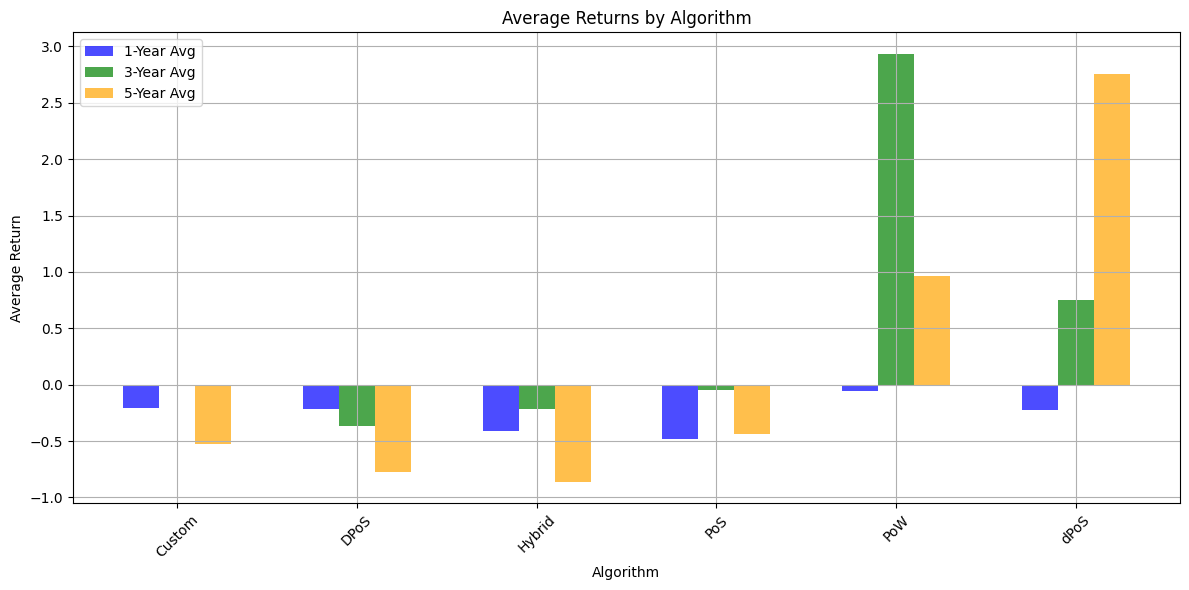

In [7]:
# Group the data by 'algorithm' and calculate the average returns for each algorithm
algorithm_avg_df = pd_calculation_price.groupby('algorithm').agg({
    'retY1': 'mean',
    'retY3': 'mean',
    'retY5': 'mean'
}).reset_index()

# Create a bar chart to represent the average returns by algorithm
labels = algorithm_avg_df['algorithm']
avg_retY1 = algorithm_avg_df['retY1']
avg_retY3 = algorithm_avg_df['retY3']
avg_retY5 = algorithm_avg_df['retY5']

# Define the x-axis positions for bars
x = range(len(labels))

# Set the bar width
bar_width = 0.2

# Create bar plots for each time period
plt.figure(figsize=(12, 6))
plt.bar(x, avg_retY1, width=bar_width, label='1-Year Avg', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in x], avg_retY3, width=bar_width, label='3-Year Avg', color='green', alpha=0.7)
plt.bar([i + 2 * bar_width for i in x], avg_retY5, width=bar_width, label='5-Year Avg', color='orange', alpha=0.7)

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Average Return')
plt.title('Average Returns by Algorithm')
plt.xticks([i + bar_width for i in x], labels, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
